# Projeto de Análise de Dados Imobiliários

Este notebook realiza a análise de dados imobiliários a partir de um arquivo CSV contendo informações sobre imóveis de leilão no PR, esses dados são reais e foram pegos do site da caixa. *Esse código poderá ser usado para extrair dados futuros também!*

link: https://venda-imoveis.caixa.gov.br/sistema/download-lista.asp

data que foi realizado o procedimento **27/02/2024**

Utilizando a linguagem de programação Python e bibliotecas como pandas e matplotlib, o projeto abrange as seguintes etapas:

**1. Carregamento dos Dados:**
   - Carregamento de um arquivo CSV contendo informações sobre imóveis na região.

**2. Limpeza e Estruturação dos Dados:**
   - Seleção de colunas relevantes.
   - Tratamento de valores ausentes e correção de formatos.

**3. Análise Exploratória:**
   - Visualização da distribuição de preços.
   - Identificação das cidades com mais ocorrências.
   - Criação de gráficos para insights visuais.

**4. Identificação da Casa Mais Cara e Mais Barata:**
   - Utilização de dados para encontrar a casa com o maior e menor preço.

**5. Visualização Detalhada:**
   - Criação de gráficos detalhados para a casa mais cara e mais barata.

**6. GitHub:**
   - Disponibilização do código-fonte e dados no GitHub.

Este notebook fornece uma visão abrangente do processo de análise de dados imobiliários, desde a importação até a visualização de insights cruciais. Sinta-se à vontade para contribuir, reportar problemas ou adaptar o código conforme necessário.

In [ ]:
#bibliotecas
pip install pandas
pip install matplotlib
pip install tabulate

In [6]:
import pandas as pd

#Subindo um arquivo.csv com pandas, usando o delimitador ";" e encoding "latin1" e correção de linhas com erro

df = pd.read_csv('Lista_imoveis_PR.csv', delimiter=';', encoding='latin1', error_bad_lines=False)

<ipython-input-6-4dcbb20797a7>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('Lista_imoveis_PR.csv', delimiter=';', encoding='latin1', error_bad_lines=False)
Skipping line 377: expected 11 fields, saw 12



In [7]:
#verificando se deu certo
print(df.head())

    N° do imóvel   UF                Cidade                 Bairro  \
0  8037500112480  PR   ALMIRANTE TAMANDARE         LAMENHA GRANDE    
1  8787703665107  PR   ALMIRANTE TAMANDARE   JARDIM SANTO ANTONIO    
2  8787704568431  PR   ALMIRANTE TAMANDARE   JARDIM SANTO ANTONIO    
3  8787700490667  PR   ALMIRANTE TAMANDARE              CACHOEIRA    
4  8787700674415  PR   ALMIRANTE TAMANDARE                 TANGUA    

                                            Endereço       Preço  \
0     RUA  JACOB GUBAUA, N. SN, CS 02, LT 02, QD 03   136.200,00   
1  RUA MAURICIO ROSEMANN, N. 455, Apto 513, BL 05...  165.000,00   
2  RUA MAURICIO ROSEMANN, N. 455, Apto 321, BL 03...  153.000,00   
3        TRAVESSA SCHULTZ, N. 288, Apto 1623, BL 16   183.676,47   
4  RUA R JOSE KLEINA, N. 501, 124, 31, N. 501, Ap...  158.843,69   

  Valor de avaliação  Desconto  \
0         227.000,00      40.0   
1         165.000,00       0.0   
2         153.000,00       0.0   
3         180.847,96       0.0   


In [8]:
#tirando informações sobre o df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0    N° do imóvel        562 non-null    int64  
 1   UF                   562 non-null    object 
 2   Cidade               562 non-null    object 
 3   Bairro               562 non-null    object 
 4   Endereço             562 non-null    object 
 5   Preço                562 non-null    object 
 6   Valor de avaliação   562 non-null    object 
 7   Desconto             562 non-null    float64
 8   Descrição            562 non-null    object 
 9   Modalidade de venda  562 non-null    object 
 10  Link de acesso       562 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 48.4+ KB
None


In [9]:
# Carregando o arquivo CSV com as correções necessárias
arquivo_csv = 'Lista_imoveis_PR.csv'
colunas_selecionadas = ["Link de acesso", "Modalidade de venda", "Descrição", "Valor de avaliação", "Desconto", "Preço", "Endereço", "Bairro", "Cidade", "UF"]

# Utilizando o delimitador ";", a codificação "latin1" e pulando linhas problemáticas
df = pd.read_csv(arquivo_csv, delimiter=';', encoding='latin1', on_bad_lines='skip', usecols=colunas_selecionadas)

# Exibindo as primeiras linhas do DataFrame
print(df.head())


    UF                Cidade                 Bairro  \
0  PR   ALMIRANTE TAMANDARE         LAMENHA GRANDE    
1  PR   ALMIRANTE TAMANDARE   JARDIM SANTO ANTONIO    
2  PR   ALMIRANTE TAMANDARE   JARDIM SANTO ANTONIO    
3  PR   ALMIRANTE TAMANDARE              CACHOEIRA    
4  PR   ALMIRANTE TAMANDARE                 TANGUA    

                                            Endereço       Preço  \
0     RUA  JACOB GUBAUA, N. SN, CS 02, LT 02, QD 03   136.200,00   
1  RUA MAURICIO ROSEMANN, N. 455, Apto 513, BL 05...  165.000,00   
2  RUA MAURICIO ROSEMANN, N. 455, Apto 321, BL 03...  153.000,00   
3        TRAVESSA SCHULTZ, N. 288, Apto 1623, BL 16   183.676,47   
4  RUA R JOSE KLEINA, N. 501, 124, 31, N. 501, Ap...  158.843,69   

  Valor de avaliação Desconto  \
0         227.000,00    40.00   
1         165.000,00     0.00   
2         153.000,00     0.00   
3         180.847,96     0.00   
4         150.000,00     0.00   

                                           Descrição  \
0  Ca

In [10]:
import pandas as pd

# Carregando o arquivo CSV com as correções necessárias
arquivo_csv = 'Lista_imoveis_PR.csv'
colunas_selecionadas = ["Link de acesso", "Modalidade de venda", "Descrição", "Valor de avaliação", "Desconto", "Preço", "Endereço", "Bairro", "Cidade", "UF"]

# Utilizando o delimitador ";", a codificação "latin1" e pulando linhas problemáticas
df = pd.read_csv(arquivo_csv, delimiter=';', encoding='latin1', on_bad_lines='skip', usecols=colunas_selecionadas)

# Salvando o DataFrame como um arquivo Excel
excel_file = 'output.xlsx'
df.to_excel(excel_file, index=False, encoding='utf-8')

print(f"DataFrame salvo como {excel_file}.")


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


DataFrame salvo como output.xlsx.


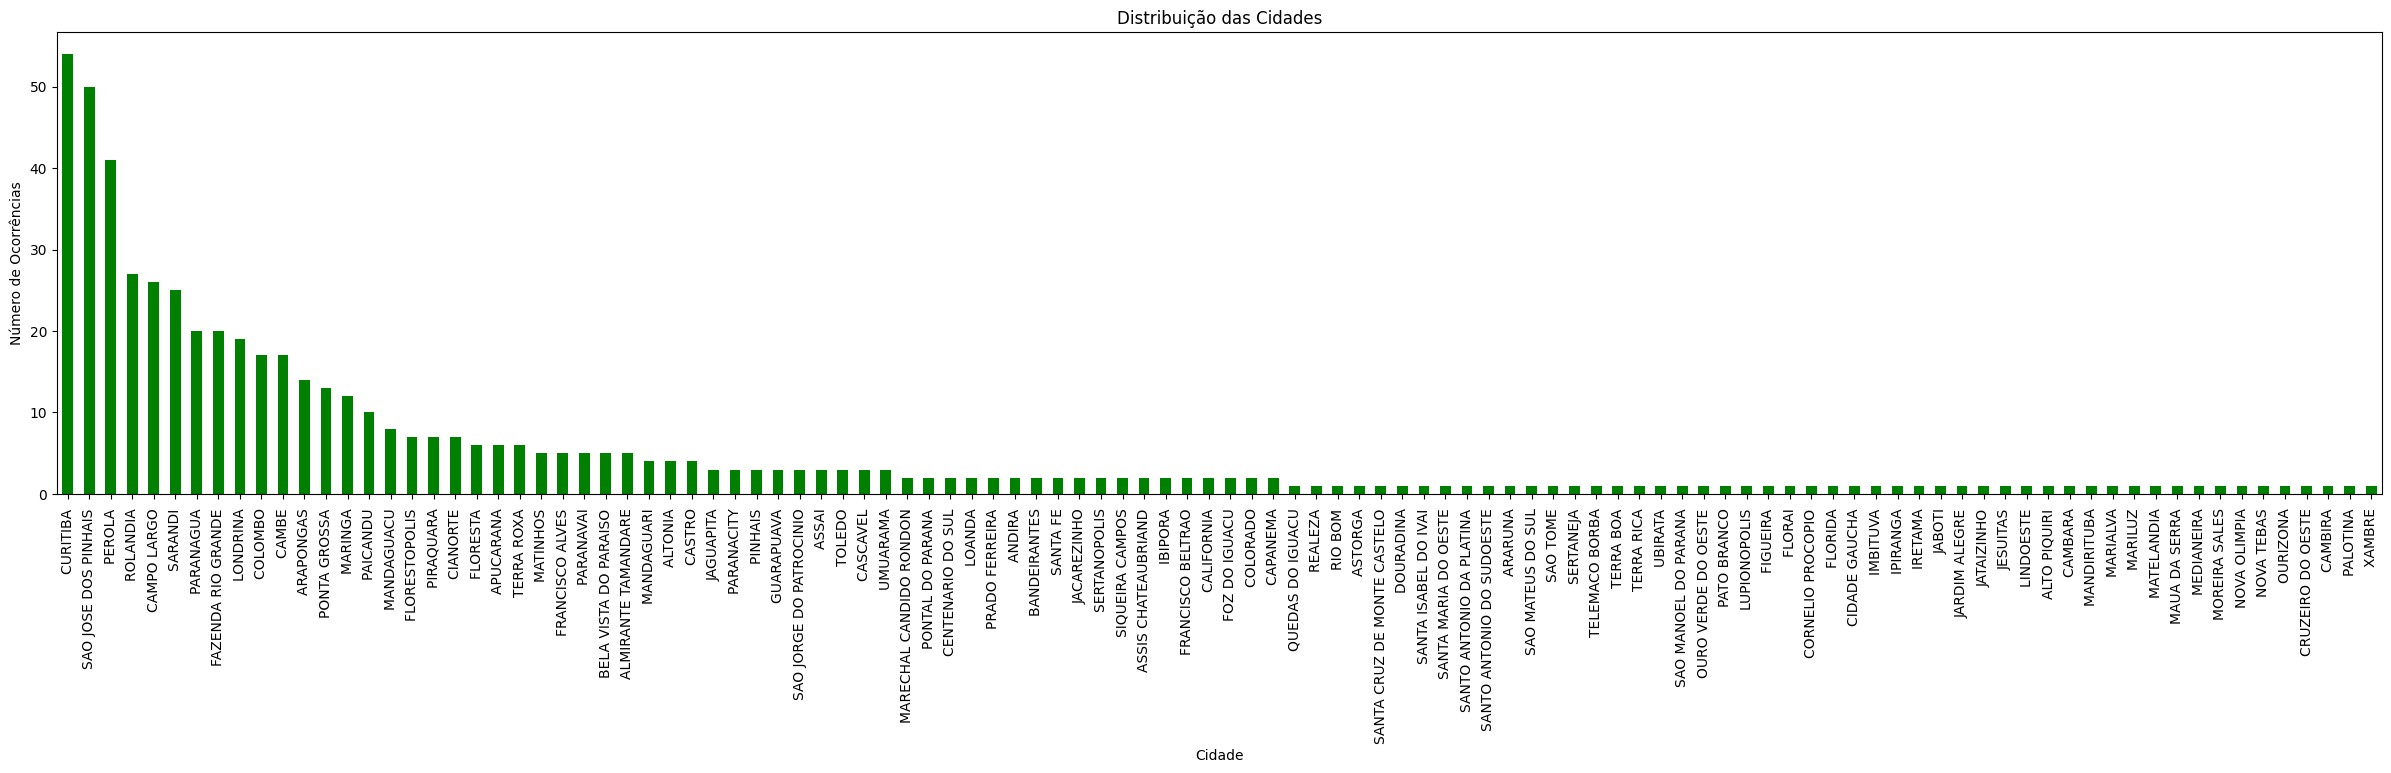

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Contando o número de ocorrências para cada cidade
cidade_counts = df['Cidade'].value_counts()

# Ajustando a largura da figura
plt.figure(figsize=(30, 6))

# Criando um gráfico de barras
cidade_counts.plot(kind='bar', color='green')
plt.title('Distribuição das Cidades')
plt.xlabel('Cidade')
plt.ylabel('Número de Ocorrências')
plt.show()

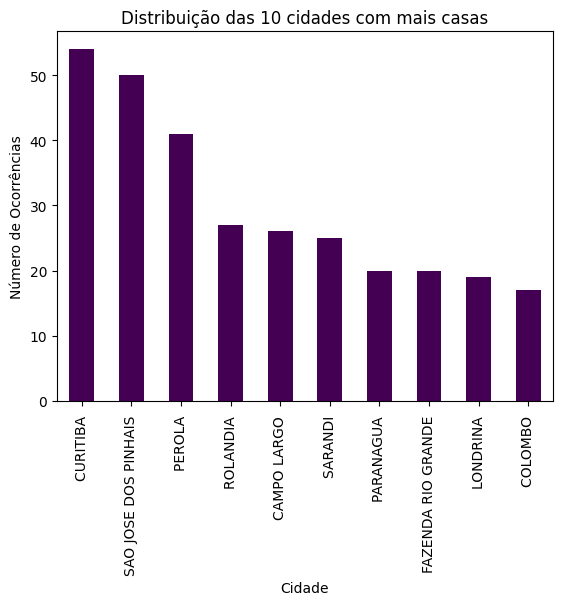

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Criando um gráfico de barras empilhadas
cidade_counts = df['Cidade'].value_counts()
cidade_counts = cidade_counts.sort_values(ascending=False)

top_n = 10  # Mostrar as 10 cidades com mais ocorrências
cidade_counts[:top_n].plot(kind='bar', stacked=True, colormap='viridis')
plt.title(f'Distribuição das {top_n} cidades com mais casas')
plt.xlabel('Cidade')
plt.ylabel('Número de Ocorrências')
plt.show()

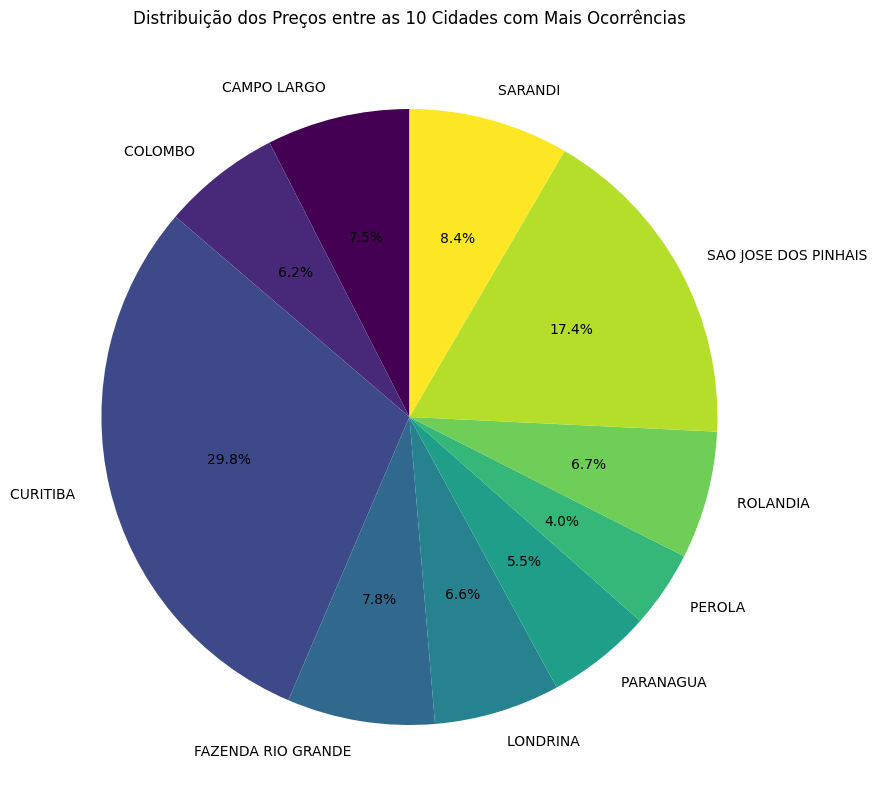

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Ajustando a largura da figura
plt.figure(figsize=(10, 10))

# Obtendo as 10 cidades com mais ocorrências
top_cidades = df['Cidade'].value_counts().nlargest(10).index

# Filtrando o DataFrame para incluir apenas as 10 cidades
df_top_cidades = df[df['Cidade'].isin(top_cidades)]

# Agrupando por cidade e calculando a soma dos preços
soma_preco_por_cidade = df_top_cidades.groupby('Cidade')['Preço'].sum()

# Criando um gráfico de pizza
soma_preco_por_cidade.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')

plt.title('Distribuição dos Preços entre as 10 Cidades com Mais Ocorrências')
plt.ylabel('')  # Removendo o rótulo do eixo y
plt.show()


In [35]:
import pandas as pd
from tabulate import tabulate

# Ordenando o DataFrame pelo desconto em ordem decrescente
df_top_descontos = df.sort_values(by='Desconto', ascending=False).head(10)

# Exibindo as 10 casas com o maior desconto em uma tabela
tabela_descontos = tabulate(df_top_descontos, headers='keys', tablefmt='pretty', showindex=False)

# Imprimindo a tabela
print(tabela_descontos)


+----+-------------------+---------------------+----------------------------------------------------------------------------------+----------+--------------------+----------+------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------+
| UF |      Cidade       |       Bairro        |                                     Endereço                                     |  Preço   | Valor de avaliação | Desconto |                                                                   Descrição                                                                    |                                                              Modalidade de venda                               

In [36]:
import pandas as pd
from tabulate import tabulate

# Encontrando o índice da casa mais cara
indice_casa_mais_cara = df['Preço'].idxmax()

# Obtendo os detalhes da casa mais cara
casa_mais_cara = df.loc[indice_casa_mais_cara]

# Criando uma tabela com as informações da casa mais cara
tabela_casa_mais_cara = tabulate([casa_mais_cara], headers='keys', tablefmt='pretty', showindex=False)

# Imprimindo a tabela
print("Detalhes da casa mais cara:")
print(tabela_casa_mais_cara)


Detalhes da casa mais cara:
+----+-------------------+----------+------------------------------------------+-----------+--------------------+----------+----------------------------------------------------------------------------------+---------------------------+--------------------------------------------------------------------------------------------------+
| UF |      Cidade       |  Bairro  |                 Endereço                 |   Preço   | Valor de avaliação | Desconto |                                    Descrição                                     |    Modalidade de venda    |                                          Link de acesso                                          |
+----+-------------------+----------+------------------------------------------+-----------+--------------------+----------+----------------------------------------------------------------------------------+---------------------------+-------------------------------------------------------------------

In [37]:
import pandas as pd
from tabulate import tabulate

# Encontrando o índice da casa mais barata
indice_casa_mais_barata = df['Preço'].idxmin()

# Obtendo os detalhes da casa mais barata
casa_mais_barata = df.loc[indice_casa_mais_barata]

# Criando uma tabela com as informações da casa mais barata
tabela_casa_mais_barata = tabulate([casa_mais_barata], headers='keys', tablefmt='pretty', showindex=False)

# Imprimindo a tabela
print("Detalhes da casa mais barata:")
print(tabela_casa_mais_barata)


Detalhes da casa mais barata:
+----+-------------------+--------+----------------------------------------------------------------------------------+---------+--------------------+----------+---------------------------------------------------------------------------------+---------------------+-------------------------------------------------------------------------------------------------------+
| UF |      Cidade       | Bairro |                                     Endereço                                     |  Preço  | Valor de avaliação | Desconto |                                    Descrição                                    | Modalidade de venda |                                            Link de acesso                                             |
+----+-------------------+--------+----------------------------------------------------------------------------------+---------+--------------------+----------+------------------------------------------------------------------------